 - combinar las tablas
 - limpiar datos
 - combinar las columnas title, brand, summary, description en una nueva columna
 - tokenizar la nueva columnas combinada
 - calcular similitud con la similitud de los items tokenizados del coseno
 - los que son muy similares los eliminamos de la lista
 - agarramos algunos items de la lista y calculamos el mean del overall
 - ordenamos nuevamente descendentemente pero esta vez basados en el overall mean => lista2
 - recomendamos los 10 primeros de la lista 2



In [2]:
import nltk
import json
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = 'C:/Users/coraj/Documents/fuzzy-recommendation-system-/AMAZON_FASHION.json.gz'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF(PATH)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [5]:
df.shape

(883636, 12)

In [27]:
PATH = 'C:/Users/coraj/Documents/fuzzy-recommendation-system-/meta_AMAZON_FASHION.json.gz'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_meta = getDF(PATH)
df_meta.head()


,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,[Package Dimensions:\n \n8....,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,[Package Dimensions:\n \n10...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$4.50,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_meta.shape

(186637, 16)

In [8]:
df_meta['asin'].nunique()

186194

In [33]:
df_meta= df_meta.drop_duplicates(subset='asin', keep='first')
df_meta.shape

(186194, 16)

In [10]:
# df_meta = pd.merge(df, df_meta, on='asin', how='left')
# pd.set_option('display.max_columns', None)
# df_meta.head()

In [11]:
# df_meta['vote'][0]

In [35]:
columns_to_combine = ['title', 'brand', 'summary', 'description', 'expliota']
existing_columns = [col for col in columns_to_combine if col in df_meta.columns]

if existing_columns:
    # Al menos una de las columnas en 'existing_columns' existe en el df_metaFrame 'df_meta'.
    # Puedes combinar las columnas existentes y crear la nueva columna 'combined_text'.
    df_meta['combined_text'] = df_meta[existing_columns].apply(lambda row: ' '.join(str(val) for val in row), axis=1)

In [14]:
df_meta['similar_item'].value_counts()

Series([], Name: count, dtype: int64)

Text(0, 0.5, 'Count')

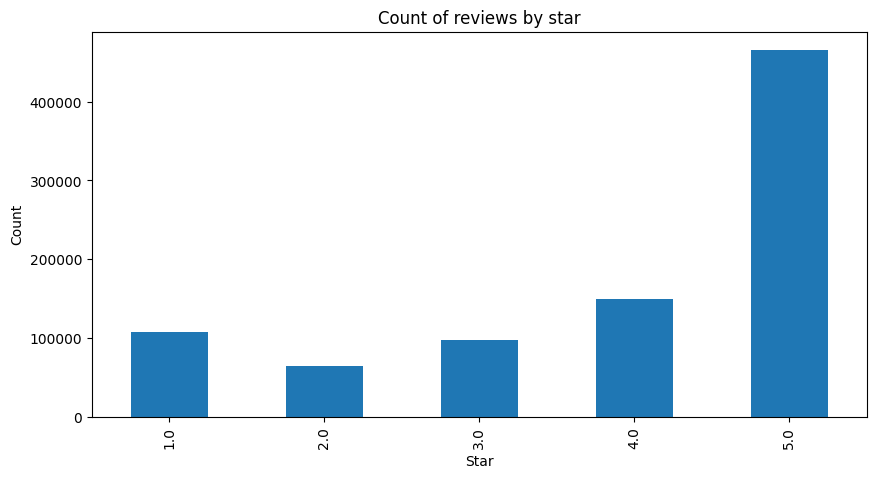

In [15]:
ax = df['overall'].value_counts().sort_index().plot(kind='bar', title="Count of reviews by star",figsize=(10, 5))
ax.set_xlabel("Star")
ax.set_ylabel("Count")


notamos que los reviews estan sesgados hacia 5 estrellas

### Tokenizacion de comentarios

In [16]:
example = df['reviewText'][39]
example

'Excellent product!'

In [17]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Excellent', 'product', '!']

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\coraj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\coraj\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\coraj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [19]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Excellent', 'JJ'), ('product', 'NN'), ('!', '.')]

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S Excellent/JJ product/NN !/.)


In [21]:
productos = df_meta['asin'].value_counts()
productos

asin
0764443682    1
B0000733OT    1
B000072XXH    1
B000072ZTR    1
B000072ZPG    1
B00007337N    1
B0000733S9    1
B0000733S8    1
B000072YTO    1
B0000732QL    1
B000073249    1
B000072WTB    1
B000072XRF    1
1291691480    1
B0000733PM    1
B0000731RO    1
B0000732QU    1
B000073209    1
B0000732EP    1
B00007325C    1
B000074ULT    1
B0000732EF    1
B000073147    1
B000078Q0G    1
B000072ZF7    1
B0000730S0    1
B0000730SA    1
B000072XQQ    1
1940280001    1
1940735033    1
1940967805    1
1942705034    1
3293015344    1
5378828716    1
6041002984    1
630456984X    1
7106116521    1
8037200124    1
8037200221    1
8279996567    1
9239282785    1
9239281533    1
9269808971    1
9654263246    1
B00004T3SN    1
B00005OTJ8    1
B00006MVYA    1
B000072X6P    1
B000072WZM    1
B000078P9Q    1
Name: count, dtype: int64

In [22]:
overall_mean = df.groupby('asin')['overall'].mean().sort_values(ascending=False)
overall_mean
# num_asin_values = df_meta['asin'].nunique()
# num_asin_values

asin
0764443682    5.0
B00Y88IVK6    5.0
B00Y8MUW7M    5.0
B00Y8LF6S8    5.0
B00Y8FXRX0    5.0
             ... 
B0105EWJWC    1.0
B01DK76L5M    1.0
B01DK76L52    1.0
B01DK76L2A    1.0
B010WGHX8S    1.0
Name: overall, Length: 186189, dtype: float64

In [23]:
df_meta
df_meta= df_meta.groupby('asin')
df_meta
# df_meta['id']=[i for i in range(0,df_meta.shape[0])]

In [36]:
tokenized_rows = []
for row in df_meta['combined_text']:
    data_tokens = nltk.word_tokenize(row)
    pos_tag = nltk.pos_tag(data_tokens)
    ne_chunk = nltk.chunk.ne_chunk(pos_tag)
    tokenized_rows.append(ne_chunk)
df_meta['tokenized_combined_text'] = tokenized_rows
    

KeyboardInterrupt: 

In [ ]:
df_meta['tokenized_combined_text'][0].pprint()

(S
  Milliongadgets/NNS
  (/(
  TM/NNP
  )/)
  Earring/NNP
  Safety/NNP
  Backs/NNP
  For/IN
  (PERSON Fish/NNP Hook/NNP Small/NNP Earrings/NNP)
  (/(
  150/CD
  )/)
  nan/NN
  perfect/JJ
  replacements/NNS
  !/.
  !/.
  nan/NN)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

In [ ]:
vecs = vec.fit_transform(df_meta['combined_text'].apply(lambda x: np.str_(x)))

In [ ]:
vecs.shape

(50, 107)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sim = cosine_similarity(vecs)

sim

array([[1.        , 0.59282512, 0.76452769, ..., 0.09055414, 0.09055414,
        0.        ],
       [0.59282512, 1.        , 0.55950783, ..., 0.00850892, 0.00850892,
        0.0079163 ],
       [0.76452769, 0.55950783, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09055414, 0.00850892, 0.        , ..., 1.        , 1.        ,
        0.8170046 ],
       [0.09055414, 0.00850892, 0.        , ..., 1.        , 1.        ,
        0.8170046 ],
       [0.        , 0.0079163 , 0.        , ..., 0.8170046 , 0.8170046 ,
        1.        ]])

In [31]:
df_meta['title'][27]

'J. P. Ourse & Cie. Yellowstone Collection Ranger Shoulder Bag (Java)'

In [ ]:
df_meta.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,title,brand,feature,rank,date,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1,combined_text,id,tokenized_combined_text
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,0,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,1,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,2,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,3,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,4,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."


In [ ]:
asin = '7106116521'
movie_id=df_meta[df_meta.asin==asin]
movie_id


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,title,brand,feature,rank,date,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1,combined_text,id,tokenized_combined_text
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,0,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,1,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,2,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,3,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,4,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
5,5.0,True,"07 19, 2014",A29HLOUW0NS0EH,7106116521,Patricia R. Erwin,Exactly what I wanted.,Five Stars,1405728000,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,5,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."
6,4.0,True,"05 31, 2014",A7QS961ROI6E0,7106116521,REBECCA S LAYTON,These little plastic backs work great. No mor...,Works great!,1401494400,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milliongadgets(TM) Earring Safety Backs For Fi...,6,"[(Milliongadgets, NNS), ((, (), (TM, NNP), (),..."


In [ ]:
def recommend(asin):
    item_id = df_meta[df_meta.asin == asin]['id'].values[0]
    scores = list(enumerate(sim[item_id]))
    sorted_scores= sorted(scores, key=lambda x:x[1], reverse=True)
    sorted_scores = sorted_scores
    sorted_scores=sorted_scores[1:]
    items_selected=[df_meta[items_selected[0]==df_meta['id']]['title'].values[0] for items_selected in sorted_scores]
    return items_selected

In [ ]:
temp = recommend('B00007GDFV')
len(temp)

49

In [ ]:
def recommend_ten(movie_list):
    first_ten = []
    for movie in movie_list:
        


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()